***LTSM_RNN_Text_Classification***


In [1]:
#Importing package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import sklearn
import seaborn as sns

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Importing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Embedding, Input, Activation
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping

In [3]:
#uploading file on google colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving HamspamDataset.csv to HamspamDataset.csv
User uploaded file "HamspamDataset.csv" with length 503663 bytes


In [4]:
#Load file into dataframe
#print first 5 rows
datatset = pd.read_csv("HamspamDataset.csv", delimiter=',' , encoding='latin-1')
datatset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Text(0.5, 1.0, 'Number of ham and spam messages')

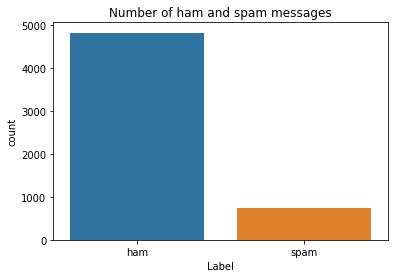

In [5]:
#Count ham and spam datatset emails ith sns
sns.countplot(datatset.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [6]:
#Label Encoder for Y
X = datatset.v2
Y = datatset.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [0]:
#plitting dataset into Training and Testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [0]:
#Process of tokenization for X_train data
# using tokenizer, texts_to_sequences and sequence.pad_sequences
#Embedding layer
#Keras offers an Embedding layer that can be usedon textual data called text prediction or textual analysis. 
#this layer converts input data be integer
# encoded, so that each word is represented by a unique integer.
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

#Defining Model
model = Sequential()
model.add(Embedding(max_words,50,input_length=max_len))
model.add(LSTM(100))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [0]:
#Compiling model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
#Training model
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=3,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3788 samples, validate on 948 samples
Epoch 1/3
3788/3788 [==============================] - 8s 2ms/step - loss: 0.3983 - accuracy: 0.8619 - val_loss: 0.1911 - val_accuracy: 0.9293
Epoch 2/3
3788/3788 [==============================] - 7s 2ms/step - loss: 0.1098 - accuracy: 0.9728 - val_loss: 0.0647 - val_accuracy: 0.9810
Epoch 3/3
3788/3788 [==============================] - 7s 2ms/step - loss: 0.0424 - accuracy: 0.9876 - val_loss: 0.0552 - val_accuracy: 0.9852


In [11]:
#Evaluating model
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
accr = model.evaluate(test_sequences_matrix,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

836/836 [==============================] - 1s 660us/step
Test set
  Loss: 0.047
  Accuracy: 0.987


In [16]:
#single Prediciton of single_text
single = ["Congratulations! you have won 100,000$ this week, click here to claim fast"]
txt = tok.texts_to_sequences(single)
txt = sequence.pad_sequences(txt, maxlen=max_len)
preds = model.predict(txt)
print(preds)
preds = np.round(preds)
print(preds)
preds = preds.astype(int)
preds =le.inverse_transform(preds)
print("You have " + preds + " email!")
#le.inverse_transform(pred.astype(int))
#labelencoder.inverse_transform(X[:,0].astype(int))

[[0.98882]]
[[1.]]
['You have spam email!']


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
#Predicting the X_test
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_test)
X_test = tok.texts_to_sequences(X_test)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)
prediction = model.predict(X_test)
print(prediction)
prediction = np.round(prediction)
prediction = prediction.astype(int)
prediction =le.inverse_transform(prediction)
print(prediction)


[[1.70196258e-02]
 [5.40861813e-03]
 [5.97098330e-03]
 [5.43423137e-03]
 [6.93747820e-03]
 [4.97773348e-04]
 [3.95637862e-02]
 [3.94068472e-02]
 [1.63154735e-03]
 [2.42700172e-03]
 [1.66940480e-01]
 [2.68110912e-02]
 [1.01635261e-02]
 [1.62574463e-02]
 [4.95221347e-01]
 [2.10055456e-04]
 [3.58519796e-03]
 [5.23749515e-02]
 [1.37494586e-03]
 [3.30070071e-02]
 [1.23351999e-02]
 [1.56502659e-03]
 [9.26446393e-02]
 [3.48749645e-02]
 [6.43972382e-02]
 [1.16527674e-03]
 [2.08264985e-03]
 [2.69022584e-03]
 [1.03137121e-04]
 [2.87778471e-02]
 [8.87346417e-02]
 [2.81455112e-03]
 [1.08566331e-02]
 [1.80456173e-02]
 [7.94709008e-03]
 [2.24817544e-03]
 [1.04387896e-02]
 [1.31151546e-02]
 [4.96932538e-03]
 [3.86536424e-03]
 [1.89618871e-03]
 [2.79082805e-01]
 [3.96013865e-03]
 [1.44863233e-01]
 [3.79056437e-03]
 [6.09230017e-04]
 [1.93438260e-03]
 [4.50544469e-02]
 [3.24837724e-03]
 [1.81594826e-02]
 [3.26386397e-03]
 [9.41746116e-01]
 [1.24988377e-01]
 [1.02891162e-01]
 [5.15366830e-02]
 [2.738555

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***Code Ends***